In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWh6pGH2C-fZRFksVc55OG0XQX7u3qJgx7BuzAVE4991U2AndYKwD9o
Mounted at /content/drive


In [4]:
train=pd.read_csv('/content/drive/MyDrive/21_days_challenge_project/intermediate/Train.csv')

In [5]:
test=pd.read_csv('/content/drive/MyDrive/21_days_challenge_project/intermediate/Test.csv')

Checking dataset for null value




In [8]:
print("Train Dataset:\n")
print(train.isnull().sum().sort_values(ascending=False),"\n\n",train.isnull().sum()/train.shape[0] *100,"\n\n")
print("Test dataset:\n")
print(test.isnull().sum().sort_values(ascending=False),"\n\n",test.isnull().sum()/test.shape[0] *100,"\n\n")

Train Dataset:

Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test dataset:

Outlet_Size                  1606
Item_Weight              

In [10]:
print("Outlet_Size:\n", train.Outlet_Size.value_counts())
print("Item_Weight:\n", train.Item_Weight.value_counts())

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64


As outlet size is catagorical, Mode is used


In [13]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].dropna().mode().values[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].dropna().mode().values[0])

In [14]:
#check missing values
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

as item weight is numerical, median is used

In [15]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].dropna().mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].dropna().mean())

In [16]:
#check missing values for itemweight
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

split into numerical n categorical


In [17]:
num = train.select_dtypes('number').columns.to_list()
cat = train.select_dtypes('object').columns.to_list()
num_set =  train[num]
cat_set = train[cat]
[train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64, Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64, OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64, Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64, Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type, dty

correcting different category names in item fat content

In [18]:
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)

train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [47]:
tr_df['Outlet_Age'], te_df['Outlet_Age']= tr_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), te_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

In [47]:
import seaborn as sys
import matplotlib.pyplot as plt


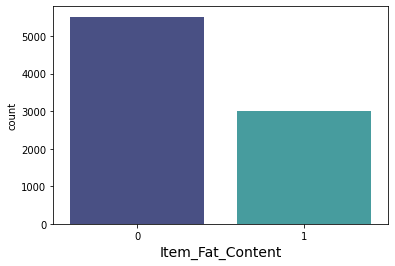

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

for item fat contenct most items sold are 0->low fat

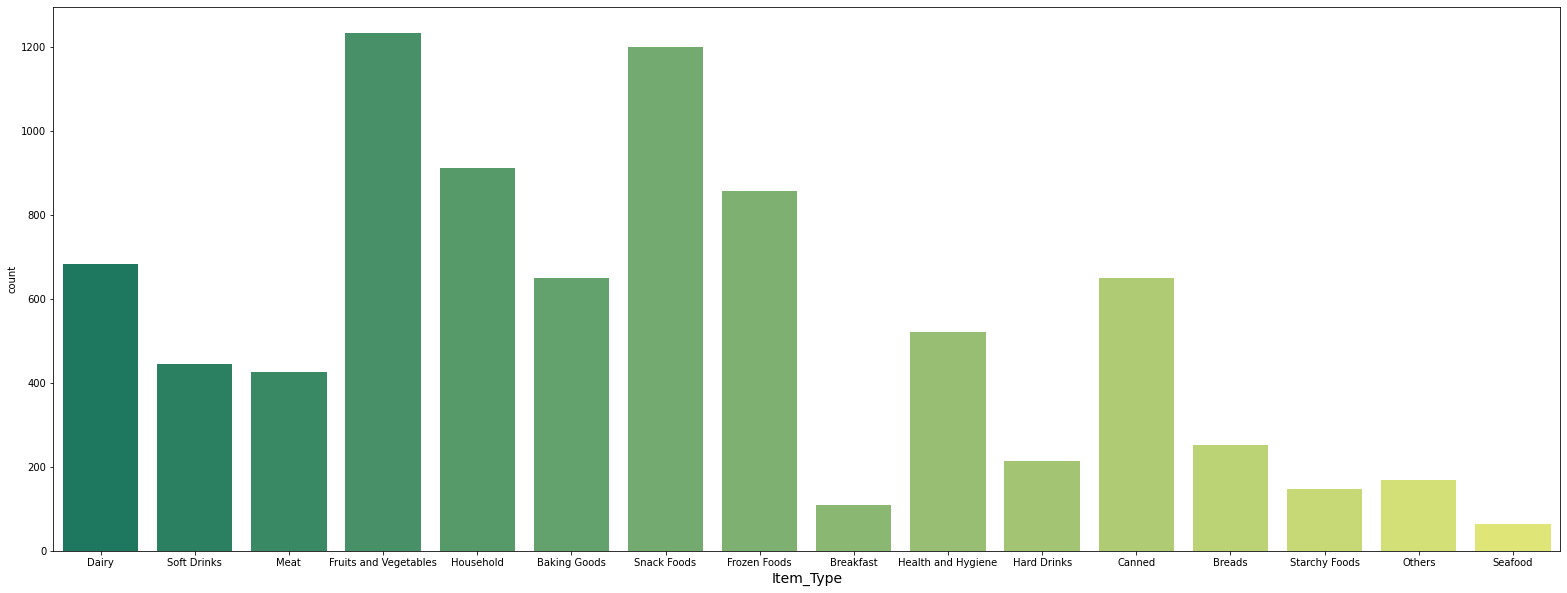

In [49]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=train ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

here, most popular by far are fruit&vegetable and snack

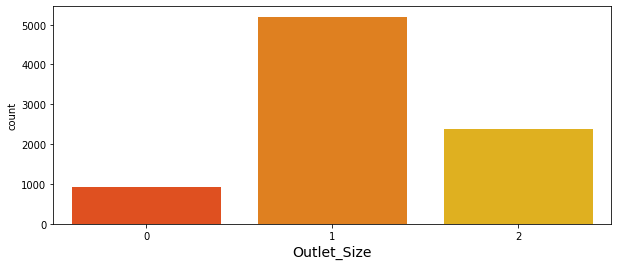

In [51]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=train ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

outlet size is mostly 1-> medium

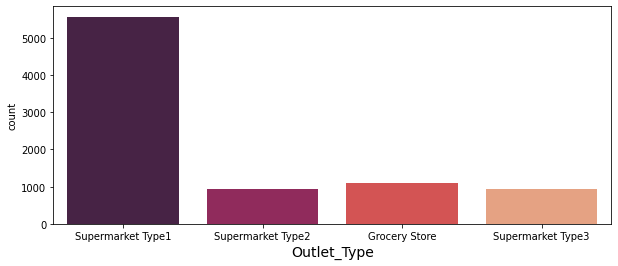

In [52]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

most common is supermarker (outlet)

taking outlet type and item type for onehot encoding

In [19]:
cat_set.apply(lambda x: x.nunique()) #

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [24]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [26]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052


applying one hot encoding


In [29]:
cols = ['Item_Type','Outlet_Type']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(train[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(test[cols])).astype('int64')
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)
tr_oh.index = train.index #include indexes
te_oh.index = test.index
tr_fe = pd.concat([train, tr_oh], axis=1) #feature engineered
te_fe = pd.concat([test, te_oh], axis=1)

In [30]:
tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [33]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


train test split 75:25


In [34]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 0)

In [35]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

Linear regression

In [37]:
LR = LinearRegression(normalize=True)

In [38]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [39]:
y_predict = LR.predict(X_test)

In [40]:
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

In [41]:
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 840.58

 Mean Squared Error: 1296577.3

 R^2 Score: 0.5559

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) score: 0.5582


Random forest regression


In [42]:
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)

In [43]:
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=4, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [44]:
y_predict = RFR.predict(X_test)

In [45]:
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)

In [46]:
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 987.2

 Mean Squared Error: 1831297.27

 R^2 Score: 0.3727

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=4, oob_score=False,
                      random_state=101, verbose=0, warm_start=False) Scores:
0.56
0.52
0.52
0.55
0.56
Average RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estim

as seen from the MEA of both Linear regression and randomforest, linear regression performs better with MEA of 838 while randonforest generate score of 1030
